<a href="https://colab.research.google.com/github/jsKim-prog/AIStudy24/blob/master/StochasticGradientDescentStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 전처리

In [ ]:
import pandas as pd
data = pd.read_csv('https://bit.ly/fish_csv_data')
data.head(10)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
5,Bream,450.0,29.7,34.7,13.6024,4.9274
6,Bream,500.0,29.7,34.5,14.1795,5.2785
7,Bream,390.0,30.0,35.0,12.6700,4.6900
8,Bream,450.0,30.0,35.1,14.0049,4.8438
9,Bream,500.0,30.7,36.2,14.2266,4.9594


In [ ]:
# data를 Species -> target / 나머지 -> input으로 분리
d_input = data[['Weight', 'Length', 'Diagonal','Height', 'Width']].to_numpy()
d_target = data['Species'].to_numpy()
print(d_input.shape, d_target.shape)

(159, 5) (159,)


In [ ]:
# 훈련세트와 테스트 세트로 분리 -> 119, 40개 씩으로 분리(특성: 5개)
from sklearn.model_selection import train_test_split

tr_input, ts_input, tr_target, ts_target = train_test_split(d_input, d_target)
print(tr_input.shape, ts_input.shape)
print(tr_target.shape, ts_target.shape)

(119, 5) (40, 5)
(119,) (40,)


In [ ]:
import numpy as np
print(np.unique(tr_target))
print(tr_target[:5])
print(tr_input[:5])

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Bream' 'Perch' 'Perch' 'Bream' 'Roach']
[[430.      29.      34.      12.444    5.134 ]
 [820.      39.      41.3     12.4313   7.3514]
 [690.      37.      39.3     10.5717   6.3666]
 [450.      29.7     34.7     13.6024   4.9274]
 [110.      20.8     23.1      6.1677   3.3957]]


In [ ]:
# input 데이터의 표준점수화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(tr_input)
tr_scaled = ss.transform(tr_input)  # 변형
ts_scaled = ss.transform(ts_input)

print(tr_scaled.shape, ts_scaled.shape)
print(tr_scaled[:5])

(119, 5) (40, 5)
[[ 0.01874378  0.01650663  0.18838089  0.74028582  0.37559713]
 [ 1.04215437  0.89342114  0.78023074  0.73744472  1.62357034]
 [ 0.70101751  0.71803824  0.6180801   0.32143619  1.0693158 ]
 [ 0.07122638  0.07789064  0.24513362  0.99942988  0.25932074]
 [-0.82097772 -0.70256328 -0.69534011 -0.66377654 -0.60273417]]


## 훈련 및 평가
알고리즘 : 확률적 경사하강법
* 손실함수 : loss = 'log_loss'
* 에포크 회수 : max_iter=number
* 조기종료 여부 : tol=None



In [ ]:
# 손실함수 비교 log_loss / hinge
from sklearn.linear_model import SGDClassifier

sc_log = SGDClassifier(loss='log_loss', max_iter=100)
sc_log.fit(tr_scaled, tr_target)

print(sc_log.score(tr_scaled, tr_target))
print(sc_log.score(ts_scaled, ts_target))

0.8487394957983193
0.825


In [ ]:
sc_hg = SGDClassifier(loss='hinge', max_iter=100)
sc_hg.fit(tr_scaled, tr_target)

print(sc_hg.score(tr_scaled, tr_target))
print(sc_hg.score(ts_scaled, ts_target))

0.8907563025210085
0.9


In [ ]:
# 점진적 학습 효과
sc_log.partial_fit(tr_scaled, tr_target)

print(sc_log.score(tr_scaled, tr_target))
print(sc_log.score(ts_scaled, ts_target))
# -> 정확도가 떨어짐

0.7899159663865546
0.725


In [ ]:
sc_hg.partial_fit(tr_scaled, tr_target)

print(sc_hg.score(tr_scaled, tr_target))
print(sc_hg.score(ts_scaled, ts_target))

0.8319327731092437
0.875


In [ ]:
# 에포크 횟수 비교
sc = SGDClassifier(loss = 'log_loss')
# 결과 누적할 리스트
tr_scores = []
ts_scores = []
cl = np.unique(tr_target)

# 파이썬의 1회용 변수 사용하여 0~300번의 에포크 훈련 점수 비교
for _ in range(0, 300):
    sc.partial_fit(tr_scaled, tr_target, classes=cl)
    tr_scores.append(sc.score(tr_scaled, tr_target))
    ts_scores.append(sc.score(ts_scaled, ts_target))


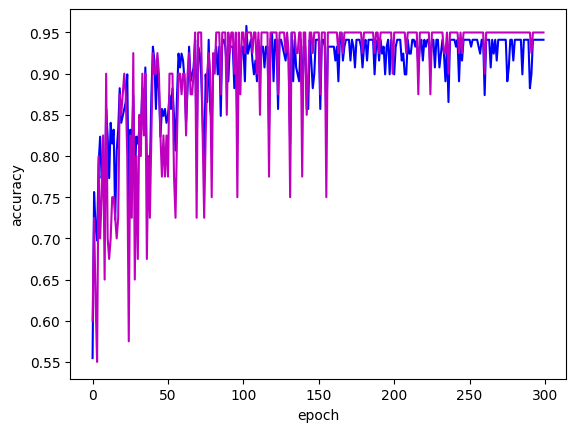

In [ ]:
import matplotlib.pyplot as plt

plt.plot(tr_scores, c='b')
plt.plot(ts_scores, c='m')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
print(tr_scores)

[0.5546218487394958, 0.7563025210084033, 0.7142857142857143, 0.6974789915966386, 0.7899159663865546, 0.8235294117647058, 0.773109243697479, 0.7899159663865546, 0.7226890756302521, 0.8571428571428571, 0.8235294117647058, 0.773109243697479, 0.8403361344537815, 0.8151260504201681, 0.8319327731092437, 0.7226890756302521, 0.8067226890756303, 0.8319327731092437, 0.8823529411764706, 0.8403361344537815, 0.8487394957983193, 0.8571428571428571, 0.865546218487395, 0.8991596638655462, 0.7394957983193278, 0.8319327731092437, 0.8067226890756303, 0.8739495798319328, 0.773109243697479, 0.8235294117647058, 0.8151260504201681, 0.8319327731092437, 0.8319327731092437, 0.8823529411764706, 0.8319327731092437, 0.907563025210084, 0.7899159663865546, 0.7983193277310925, 0.7815126050420168, 0.8739495798319328, 0.9327731092436975, 0.9159663865546218, 0.8571428571428571, 0.907563025210084, 0.8823529411764706, 0.8235294117647058, 0.8571428571428571, 0.8487394957983193, 0.8571428571428571, 0.8403361344537815, 0.848

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=120, tol=None)
sc.fit(tr_scaled, tr_target)
print(sc.score(tr_scaled, tr_target))
print(sc.score(ts_scaled, ts_target))

0.8151260504201681
0.75
